### Step 0: Imports and Reading Data

In [457]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib.dates as mdates
from random import randint
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)


In [458]:
df = pd.read_csv('../data/csv/US Raw Events.csv')

/var/folders/_6/zcd8685d3_v7l0bntk77ktl40000gn/T/ipykernel_65637/2845333868.py:1: DtypeWarning: Columns (2,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/csv/US Raw Events.csv')


### Step 1: Data Understanding

In [459]:
df.shape

(96655, 77)

In [460]:
df.head(5)

,EVENT_ID,EVENT_NAME,EVENT_NOTES,EVENT_INFO,EVENT_STATUS,EVENT_START_DATETIME,EVENT_END_DATETIME,EVENT_START_LOCAL_DATE,EVENT_START_LOCAL_TIME,ONSALE_START_DATETIME,ONSALE_END_DATETIME,CLASSIFICATION_SEGMENT,CLASSIFICATION_GENRE,CLASSIFICATION_SUB_GENRE,EVENT_IMAGE_URL,MIN_PRICE,MAX_PRICE,CURRENCY,ATTRACTION_NAME,ATTRACTION_ID,ATTRACTION_IMAGE_URL,VENUE_NAME,VENUE_ID,VENUE_STREET,VENUE_CITY,VENUE_STATE_CODE,VENUE_COUNTRY_CODE,VENUE_LATITUDE,VENUE_LONGITUDE,VENUE_ZIP_CODE,VENUE_TIMEZONE,ATTRACTION_URL,VENUE_URL,PRIMARY_EVENT_URL,RESALE_EVENT_URL,PRESALE_NAME,PRESALE_DATETIME_RANGE,LEGACY_EVENT_ID,LEGACY_VENUE_ID,LEGACY_ATTRACTION_ID,PRESALE_NAME.1,PRESALE_DESCRIPTION,PRESALE_START_DATETIME,PRESALE_END_DATETIME,SOURCE,CLASSIFICATION_TYPE,CLASSIFICATION_SUB_TYPE,PROMOTER_ID,PROMOTER_NAME,CLASSIFICATION_SEGMENT_ID,CLASSIFICATION_GENRE_ID,CLASSIFICATION_SUB_GENRE_ID,CLASSIFICATION_TYPE_ID,CLASSIFICATION_SUB_TYPE_ID,ATTRACTION_CLASSIFICATION_SEGMENT_ID,ATTRACTION_CLASSIFICATION_SEGMENT,ATTRACTION_CLASSIFICATION_GENRE_ID,ATTRACTION_CLASSIFICATION_GENRE,ATTRACTION_CLASSIFICATION_SUB_GENRE_ID,ATTRACTION_CLASSIFICATION_SUB_GENRE,ATTRACTION_CLASSIFICATION_TYPE_ID,ATTRACTION_CLASSIFICATION_TYPE,ATTRACTION_CLASSIFICATION_SUB_TYPE_ID,ATTRACTION_CLASSIFICATION_SUB_TYPE,MIN_PRICE_WITH_FEES,MAX_PRICE_WITH_FEES,TRANSACTABLE,HOT_EVENT,ACCESSIBLE_SEATING_DETAIL,ADA_PHONE,ADA_CUSTOM_COPY,ADA_HOURS,ACCESSIBILITY_INFO,API_ONSALE_START_DATETIME,PLEASE_NOTE,IMPORTANT_INFORMATION,EVENT_END_LOCAL_DATE
0,rZ7HnEZ1AfF6aK,Tonight at the Improv!,NaN,DO NOT PURCHASE TICKETS FROM ANYONE OR ANY OTH...,onsale,2025-03-02T05:30:00Z,NaN,2025-03-01,21:30,2025-01-20T21:00:00Z,2025-03-02T06:00:00Z,Undefined,NaN,NaN,https://i.ticketweb.com/i/00/12/86/60/03_Edp.j...,29.34,29.34,USD,NaN,NaN,NaN,Hollywood Improv (The Main Room),rZ7HnEZ178sj4,8162 Melrose Avenue,Hollywood,CA,US,34.083418,-118.366556,90046,America/Los_Angeles,NaN,https://www.ticketweb.com/venue/hollywood-impr...,https://www.ticketweb.com/event/tonight-at-the...,NaN,NaN,NaN,rZ7HnEZ1AfF6aK,NaN,NaN,NaN,NaN,NaN,NaN,ticketweb,Undefined,Undefined,NaN,NaN,KZFzniwnSyZfZ7v7nl,NaN,NaN,KZAyXgnZfZ7v7nI,KZFzBErXgnZfZ7v7lJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,2025-01-20T22:00:00Z,This event is 21 and over. Any ticket holder u...,NaN,NaN
1,rZ7HnEZ1AfF6aN,Tonight at the Improv!,NaN,DO NOT PURCHASE TICKETS FROM ANYONE OR ANY OTH...,onsale,2025-03-09T05:30:00Z,NaN,2025-03-08,21:30,2025-01-20T21:00:00Z,2025-03-09T06:00:00Z,Undefined,NaN,NaN,https://i.ticketweb.com/i/00/12/86/60/03_Edp.j...,29.34,29.34,USD,NaN,NaN,NaN,Hollywood Improv (The Main Room),rZ7HnEZ178sj4,8162 Melrose Avenue,Hollywood,CA,US,34.083418,-118.366556,90046,America/Los_Angeles,NaN,https://www.ticketweb.com/venue/hollywood-impr...,https://www.ticketweb.com/event/tonight-at-the...,NaN,NaN,NaN,rZ7HnEZ1AfF6aN,NaN,NaN,NaN,NaN,NaN,NaN,ticketweb,Undefined,Undefined,NaN,NaN,KZFzniwnSyZfZ7v7nl,NaN,NaN,KZAyXgnZfZ7v7nI,KZFzBErXgnZfZ7v7lJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,2025-01-20T22:00:00Z,This event is 21 and over. Any ticket holder u...,NaN,NaN
2,rZ7HnEZ1AfF6aS,Tonight at the Improv!,NaN,DO NOT PURCHASE TICKETS FROM ANYONE OR ANY OTH...,onsale,2025-03-30T02:00:00Z,NaN,2025-03-29,19:00,2025-01-20T21:00:00Z,2025-03-30T02:30:00Z,Undefined,NaN,NaN,https://i.ticketweb.com/i/00/12/86/60/03_Edp.j...,29.34,29.34,USD,NaN,NaN,NaN,Hollywood Improv (The Main Room),rZ7HnEZ178sj4,8162 Melrose Avenue,Hollywood,CA,US,34.083418,-118.366556,90046,America/Los_Angeles,NaN,https://www.ticketweb.com/venue/hollywood-impr...,https://www.ticketweb.com/event/tonight-at-the...,NaN,NaN,NaN,rZ7HnEZ1AfF6aS,NaN,NaN,NaN,NaN,NaN,NaN,ticketweb,Undefined,Undefined,NaN,NaN,KZFzniwnSyZfZ7v7nl,NaN,NaN,KZAyXgnZfZ7v7nI,KZFzBErXgnZfZ7v7lJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,2025-01-20T22:00:00Z,This event is 21 and over. Any ticket holder u...,NaN,NaN
3,rZ7HnEZ1AfF6ad,Tonight at 

In [461]:
df.columns

Index(['EVENT_ID', 'EVENT_NAME', 'EVENT_NOTES', 'EVENT_INFO', 'EVENT_STATUS',
       'EVENT_START_DATETIME', 'EVENT_END_DATETIME', 'EVENT_START_LOCAL_DATE',
       'EVENT_START_LOCAL_TIME', 'ONSALE_START_DATETIME',
       'ONSALE_END_DATETIME', 'CLASSIFICATION_SEGMENT', 'CLASSIFICATION_GENRE',
       'CLASSIFICATION_SUB_GENRE', 'EVENT_IMAGE_URL', 'MIN_PRICE', 'MAX_PRICE',
       'CURRENCY', 'ATTRACTION_NAME', 'ATTRACTION_ID', 'ATTRACTION_IMAGE_URL',
       'VENUE_NAME', 'VENUE_ID', 'VENUE_STREET', 'VENUE_CITY',
       'VENUE_STATE_CODE', 'VENUE_COUNTRY_CODE', 'VENUE_LATITUDE',
       'VENUE_LONGITUDE', 'VENUE_ZIP_CODE', 'VENUE_TIMEZONE', 'ATTRACTION_URL',
       'VENUE_URL', 'PRIMARY_EVENT_URL', 'RESALE_EVENT_URL', 'PRESALE_NAME',
       'PRESALE_DATETIME_RANGE', 'LEGACY_EVENT_ID', 'LEGACY_VENUE_ID',
       'LEGACY_ATTRACTION_ID', 'PRESALE_NAME.1', 'PRESALE_DESCRIPTION',
       'PRESALE_START_DATETIME', 'PRESALE_END_DATETIME', 'SOURCE',
       'CLASSIFICATION_TYPE', 'CLASSIFICATION_SUB

In [462]:
print(df.dtypes)



EVENT_ID                     object
EVENT_NAME                   object
EVENT_NOTES                  object
EVENT_INFO                   object
EVENT_STATUS                 object
                              ...  
ACCESSIBILITY_INFO           object
API_ONSALE_START_DATETIME    object
PLEASE_NOTE                  object
IMPORTANT_INFORMATION        object
EVENT_END_LOCAL_DATE         object
Length: 77, dtype: object


In [463]:
df.describe()

,MIN_PRICE,MAX_PRICE,VENUE_LATITUDE,VENUE_LONGITUDE,RESALE_EVENT_URL,PRESALE_NAME,PRESALE_DATETIME_RANGE,LEGACY_VENUE_ID,MIN_PRICE_WITH_FEES,MAX_PRICE_WITH_FEES
count,57192.000000,57192.000000,96589.000000,96589.000000,0.0,0.0,0.0,64392.000000,0.0,0.0
mean,44.103389,137.786942,37.591438,-94.577368,NaN,NaN,NaN,217224.224422,NaN,NaN
std,40.744637,417.955852,4.835431,19.346673,NaN,NaN,NaN,159759.121437,NaN,NaN
min,0.000000,0.000000,-87.713192,-159.371111,NaN,NaN,NaN,6.000000,NaN,NaN
25%,24.500000,35.250000,35.820643,-115.171478,NaN,NaN,NaN,57759.000000,NaN,NaN
50%,38.160000,75.000000,37.795508,-87.953513,NaN,NaN,NaN,189520.000000,NaN,NaN
75%,55.000000,129.000000,40.759300,-75.599090,NaN,NaN,NaN,376840.000000,NaN,NaN
max,3216.000000,21000.000000,64.503700,122.269633,NaN,NaN,NaN,491609.000000,NaN,NaN


In [464]:
# remove unneeded columns 

df = df[['EVENT_ID', 'EVENT_NAME', #'EVENT_NOTES', 'EVENT_INFO', 'EVENT_STATUS',
       #'EVENT_START_DATETIME', 'EVENT_END_DATETIME', 
       'EVENT_START_LOCAL_DATE',
       #'EVENT_START_LOCAL_TIME', 
       #'ONSALE_START_DATETIME',
       #'ONSALE_END_DATETIME', 
        'CLASSIFICATION_SEGMENT', # 'CLASSIFICATION_GENRE',
       #'CLASSIFICATION_SUB_GENRE', #'EVENT_IMAGE_URL', 
       #'MIN_PRICE', 
         'MAX_PRICE']].copy()
       #,'VENUE_CITY', 'CURRENCY', 'ATTRACTION_NAME', 'ATTRACTION_ID', 'ATTRACTION_IMAGE_URL',
       #'VENUE_NAME', 'VENUE_ID', 'VENUE_STREET', 
       #'VENUE_STATE_CODE', #'VENUE_COUNTRY_CODE', 
       #'VENUE_LATITUDE',
       #'VENUE_LONGITUDE', 'VENUE_ZIP_CODE', 'VENUE_TIMEZONE', #'ATTRACTION_URL',
       #'VENUE_URL', 'PRIMARY_EVENT_URL', 'RESALE_EVENT_URL', 'PRESALE_NAME',
       #'PRESALE_DATETIME_RANGE', 'LEGACY_EVENT_ID', 'LEGACY_VENUE_ID',
       #'LEGACY_ATTRACTION_ID', 'PRESALE_NAME.1', 'PRESALE_DESCRIPTION',
       #'PRESALE_START_DATETIME', 'PRESALE_END_DATETIME', 'SOURCE',
       #'CLASSIFICATION_TYPE', 'CLASSIFICATION_SUB_TYPE', 'PROMOTER_ID',
       #'PROMOTER_NAME', #'CLASSIFICATION_SEGMENT_ID', 'CLASSIFICATION_GENRE_ID',
       #'CLASSIFICATION_SUB_GENRE_ID', 'CLASSIFICATION_TYPE_ID',
      # 'CLASSIFICATION_SUB_TYPE_ID', 'ATTRACTION_CLASSIFICATION_SEGMENT_ID',
       #'ATTRACTION_CLASSIFICATION_SEGMENT',
       #'ATTRACTION_CLASSIFICATION_GENRE_ID', 'ATTRACTION_CLASSIFICATION_GENRE',
       #'ATTRACTION_CLASSIFICATION_SUB_GENRE_ID',
       #'ATTRACTION_CLASSIFICATION_SUB_GENRE',
      # 'ATTRACTION_CLASSIFICATION_TYPE_ID', 'ATTRACTION_CLASSIFICATION_TYPE',
       #'ATTRACTION_CLASSIFICATION_SUB_TYPE_ID',
       #'ATTRACTION_CLASSIFICATION_SUB_TYPE', 'MIN_PRICE_WITH_FEES',
       #'MAX_PRICE_WITH_FEES', 
       #'TRANSACTABLE', 'HOT_EVENT',
       #'ACCESSIBLE_SEATING_DETAIL', 'ADA_PHONE', 'ADA_CUSTOM_COPY',
       #'ADA_HOURS', 'ACCESSIBILITY_INFO', 'API_ONSALE_START_DATETIME',
       #'PLEASE_NOTE', 'IMPORTANT_INFORMATION', 'EVENT_END_LOCAL_DATE'

df.head(5)

,EVENT_ID,EVENT_NAME,EVENT_START_LOCAL_DATE,CLASSIFICATION_SEGMENT,MAX_PRICE
0,rZ7HnEZ1AfF6aK,Tonight at the Improv!,2025-03-01,Undefined,29.34
1,rZ7HnEZ1AfF6aN,Tonight at the Improv!,2025-03-08,Undefined,29.34
2,rZ7HnEZ1AfF6aS,Tonight at the Improv!,2025-03-29,Undefined,29.34
3,rZ7HnEZ1AfF6ad,Tonight at the Improv!,2025-03-07,Undefined,19.04
4,G5ezZb8MgIPuh,"Cirque du Soleil : ""O""",2025-05-10,Arts & Theatre,276.14


In [465]:
# rename columns
df = df.rename(columns = {'EVENT_ID':'Event_ID', 'EVENT_NAME':'Event_Name', 'EVENT_START_LOCAL_DATE':'Event_Start_Date', 'CLASSIFICATION_SEGMENT':'Classification', 
                     'CLASSIFICATION_GENRE':'Genre', 'CLASSIFICATION_SUB_GENRE':'Sub_Genre',
                     'MIN_PRICE':'Min_Price','MAX_PRICE':'Max_Price'})

df.head(5)

,Event_ID,Event_Name,Event_Start_Date,Classification,Max_Price
0,rZ7HnEZ1AfF6aK,Tonight at the Improv!,2025-03-01,Undefined,29.34
1,rZ7HnEZ1AfF6aN,Tonight at the Improv!,2025-03-08,Undefined,29.34
2,rZ7HnEZ1AfF6aS,Tonight at the Improv!,2025-03-29,Undefined,29.34
3,rZ7HnEZ1AfF6ad,Tonight at the Improv!,2025-03-07,Undefined,19.04
4,G5ezZb8MgIPuh,"Cirque du Soleil : ""O""",2025-05-10,Arts & Theatre,276.14


In [466]:
# drop duplicates and undefined data

df.isna().sum()
df = df.dropna()
df = df[df.Classification != 'Undefined']
df = df[df.Max_Price != 0.00]
df.head()

,Event_ID,Event_Name,Event_Start_Date,Classification,Max_Price
4,G5ezZb8MgIPuh,"Cirque du Soleil : ""O""",2025-05-10,Arts & Theatre,276.14
5,1avjZbx8ouIZd271,The Mentalist,2025-08-25,Arts & Theatre,59.98
6,vv1keZv-4YGA1U7Bv,Gutfeld Live '25 Featuring Greg Gutfeld & spec...,2025-06-07,Arts & Theatre,89.50
7,k7vGFb8zt7yQJ,Irish Celebration Starring Andy Cooney,2025-03-02,Music,79.50
8,15vjZbx8KayCZ,The Mentalist,2025-11-07,Arts & Theatre,59.98


In [467]:
# change event start date to datetime
df.Event_Start_Date = pd.to_datetime(df.Event_Start_Date)
df.dtypes

Event_ID                    object
Event_Name                  object
Event_Start_Date    datetime64[ns]
Classification              object
Max_Price                  float64
dtype: object

In [468]:
# check for duplicates

df.loc[df.duplicated()]


,Event_ID,Event_Name,Event_Start_Date,Classification,Max_Price


### Step 3: Max Price and Classification Analysis

In [469]:
df['Max_Price'].value_counts()


Max_Price
25.00     1809
20.00     1236
35.00     1227
43.00      965
15.00      899
          ... 
127.83       1
124.25       1
170.50       1
233.90       1
22.10        1
Name: count, Length: 2431, dtype: int64

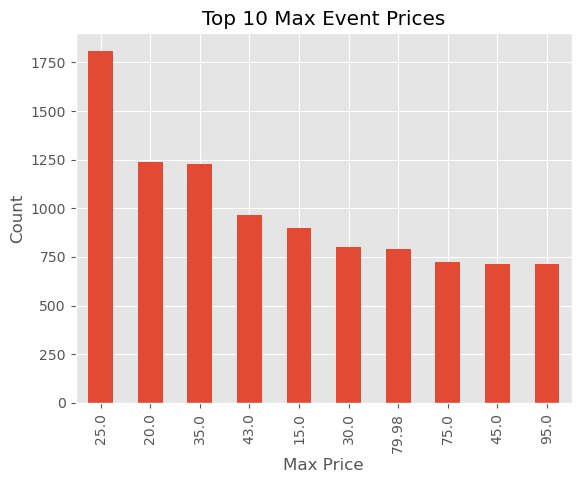

In [470]:
ax = df['Max_Price'].value_counts() \
    .head(10) \
    .plot(kind = 'bar', title = 'Top 10 Max Event Prices')
ax.set_xlabel('Max Price');
ax.set_ylabel('Count');


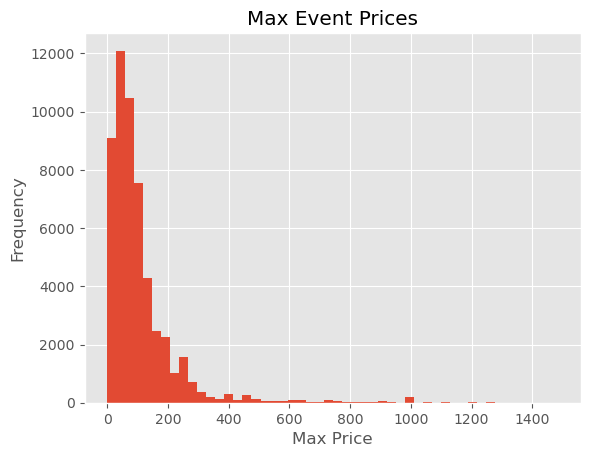

In [471]:
# plot distribution of max prices, removing outliers
no_outliers = df[df.Max_Price < 1500]
ax = no_outliers.Max_Price.plot(kind = 'hist', bins = 50, title = 'Max Event Prices');
ax.set_xlabel('Max Price');


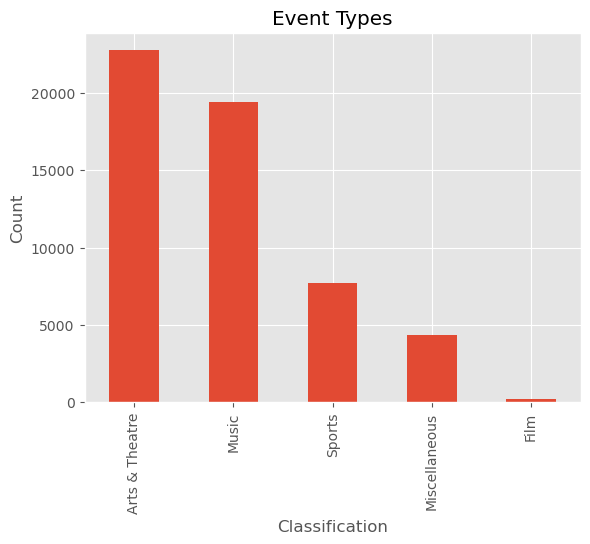

In [472]:
ax = df.Classification.value_counts().plot(kind = 'bar', title = 'Event Types');
ax.set_ylabel('Count');

### Step 4: Feature Relationships

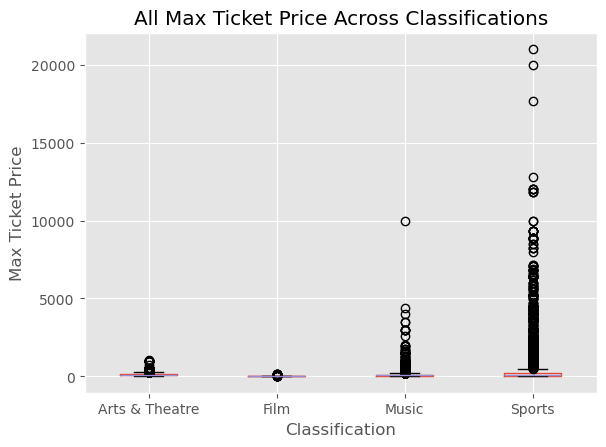

In [473]:
#upcoming events over time and their max prices with color coded by genre
ax = df[df.Classification != 'Miscellaneous'].boxplot(by = 'Classification');
plt.title('All Max Ticket Price Across Classifications')
ax.set_xlabel('Classification')
ax.set_ylabel('Max Ticket Price')
plt.suptitle('')
plt.show()



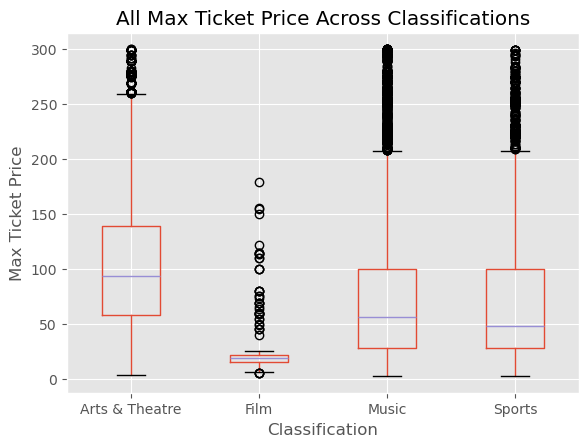

In [474]:
ax = df[(df.Max_Price < 300) & (df.Classification != 'Miscellaneous')].boxplot(by = 'Classification');
plt.title('All Max Ticket Price Across Classifications')
ax.set_xlabel('Classification')
ax.set_ylabel('Max Ticket Price')
plt.suptitle('')
plt.show()

In [475]:
# calculate upper limit of each category to understand outliers for each one and visualize them separately

# extract q1 and q3 quartiles for each category
q3 = []
q1 = []
classifications = ['Arts & Theatre', 'Film', 'Music', 'Sports']
for c in classifications:
    at_stats = df[df.Classification == f'{c}'].describe().reset_index()
    q3.append(at_stats[at_stats['index'] == '75%']['Max_Price'].iloc[0])
    q1.append(at_stats[at_stats['index'] == '25%']['Max_Price'].iloc[0])


# calculate upper limit for each class
upper_lim = []
for x in [0, 1, 2, 3]:
    u_lim = q3[x]+1.5*(q3[x] - q1[x])
    upper_lim.append(round(u_lim, 2))

print(upper_lim)

[258.3, 31.5, 208.25, 505.0]


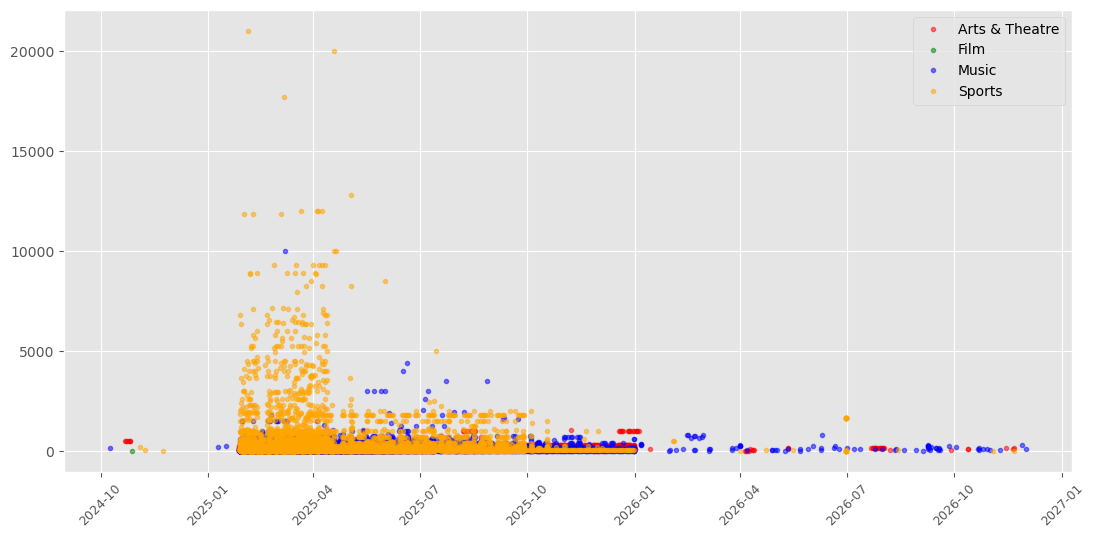

In [484]:
# plot scatter plot of max prices vs. their event dates and color code by category
df_no_misc = df[df.Classification != 'Miscellaneous']
grouped = df_no_misc.groupby('Classification')

# create color map for each group
color_map = {'Arts & Theatre': 'red', 'Film': 'green', 'Music': 'blue', 'Sports':'orange'}

# plot
fig, ax = plt.subplots(figsize = (13, 6))
ax.margins(0.05)
for name, group in grouped:
    ax.plot(group.Event_Start_Date, group.Max_Price, c = color_map[name], marker = 'o', linestyle = '', ms = 3, label = name, alpha = 0.5);
ax.legend();

# set x-axis locator to display ticks every month
#ax.xaxis.set_major_locator(mdates.MonthLocator())

# change x ticks size
plt.xticks(fontsize = 9, rotation = 45)
plt.show();



In [520]:
max_price_sports = df[(df.Classification == 'Sports') & (df.Max_Price == 21000)]['Event_Name'].iloc[0]
max_price_music = df[(df.Classification == 'Music') & (df.Max_Price == max(df[df.Classification == 'Music']['Max_Price']))]['Event_Name'].iloc[0]
max_price_film = df[(df.Classification == 'Film') & (df.Max_Price == max(df[df.Classification == 'Film']['Max_Price']))]['Event_Name'].iloc[0]
max_price_at = df[(df.Classification == 'Arts & Theatre') & (df.Max_Price == max(df[df.Classification == 'Arts & Theatre']['Max_Price']))]['Event_Name'].iloc[0]


print('The max price listed for a sports event was for the ' + str(max_price_sports) + ' at $21,000!\n')
print('The max price listed for a music event is for the ' + str(max_price_music) + ' at $10,000!\n')
print("The max price listed for a film event is for the " + str(max_price_at) + " at $1041.25.\nAt that price, I'm hoping Kevin James still has some comedic bones in his body.\n") 
print("The max price listed for a film event is for the " + str(max_price_film) + " at $179.\nThat's an expensive movie ticket!\n") 


The max price listed for a sports event was for the LA Clippers vs. Los Angeles Lakers at $21,000!

The max price listed for a music event is for the Free Beer (the Band) Florida's #1 Party Band (A Tribute to The Rooster! Marcus Outzen former QB for FSU) at $10,000!

The max price listed for a film event is for the Kevin James: Owls Don't Walk at $1041.25.
At that price, I'm hoping Kevin James still has some comedic bones in his body.

The max price listed for a film event is for the STOP MAKING SENSE: A Film by Jonathan Demme and Talking Heads at $179.
That's an expensive movie ticket!



### Step 5: Ask a Question about the Data